<a href="https://colab.research.google.com/github/senabayraktaroglu/Neural_Network_Gradient_Descent/blob/master/multilayer_nn_with_back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
HW 2 question 2
Keys: KeysView(<HDF5 file "assign2_data1.h5" (mode r)>)
['testims', 'testlbls', 'trainims', 'trainlbls']
1000
1000
1900
1900
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

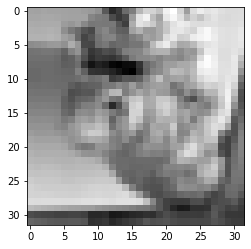

In [ ]:
import h5py
import sys
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
from scipy.special import expit, logit
import random

drive.mount('/content/gdrive')
root = '/content/gdrive/My Drive/neural_networks/HW2/assign2_data1.h5'
print("HW 2 question 2") 
with h5py.File(root, 'r') as f:
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())
    print(a_group_key)
    test_set_x = list(f['testims'])
    test_set_y = list(f['testlbls'])
    train_set_x = list(f['trainims'])
    train_set_y = list(f['trainlbls'])

print(len(test_set_x)) 
print(len(test_set_y))
print(len(train_set_x)) 
print(len(train_set_y)) 


test_set_y =[-1 if x==0 else x for x in test_set_y]
train_set_y = [-1 if x==0 else x for x in train_set_y]
print(test_set_y)
image = train_set_x[5]
plt.imshow(image,cmap='gray')
plt.show()
 

In [ ]:

import numpy as np
from numpy import random
def test_two_layer_nn(weights_1,biases_1,weights_2,biases_2,train_set_x,train_set_y):
  def find_nets1_nets2(weights_1,biases_1,weights_2,biases_2,input_features): 
    def find_outputs(nets):
      def activation_function(value):
        import math
        return math.tanh(value)      
      
      outputs =[]
      for i in range(len(nets)):
        
        outputs.append(activation_function(nets[i]))
      return np.asarray(outputs)     

    def find_nets(weights,biases,input_features):
      nets = []
      for i in range(len(weights)):
        net = sum(weights[i]*input_features) + biases[i]
        nets.append(net[0])
      return np.asarray(nets)
    
    nets_1 = find_nets(weights_1,biases_1,input_features)
    outputs_1 = find_outputs(nets_1)
    nets_2 = find_nets(weights_2,biases_2,outputs_1)
    
    return nets_1,nets_2 


  def find_outputs_1_outputs_2(nets_1,nets_2):
    def find_outputs(nets):
      def activation_function(value):
        import math
        return math.tanh(value)      
      
      outputs =[]
      for i in range(len(nets)):
        
        outputs.append(activation_function(nets[i]))
      return np.asarray(outputs)     
    outputs_1 = find_outputs(nets_1)
    outputs_2 = find_outputs(nets_2)
    return outputs_1,outputs_2


  negatives = 0
  positives = 0
  accuracy = 0
  accuracy_p = 0
  accuracy_n = 0
  error_array = []
  for index in range(len(train_set_y)):
    input_features = np.asarray(np.asarray(train_set_x[index]).flatten())/255
    nets_1,nets_2 = find_nets1_nets2(weights_1,biases_1,weights_2,biases_2,input_features)
    outputs_1,outputs_2 = find_outputs_1_outputs_2(nets_1,nets_2)    
    target = train_set_y[index]
    epsilon = target-outputs_2[0]
    error_array.append(epsilon)
    if int(target) == -1:
      negatives = negatives +1
    if int(target) == 1:
      positives = positives +1    
    if outputs_2[0] < 0 and int(target) == -1:
      accuracy = accuracy +1 
      accuracy_p =  accuracy_p +1 
    if outputs_2[0] > 0 and int(target) == 1:
      accuracy = accuracy +1
      accuracy_n =  accuracy_n +1 

  
  error_array = np.asarray(error_array)
  epsilon = np.mean(error_array)
  accuracy =100*(accuracy/len(train_set_y))
  accuracy_p =100*(accuracy_p/(len(train_set_y)/2))
  accuracy_n = 100*(accuracy_n/(len(train_set_y)/2))
  loss = 100*(epsilon)
  return loss,accuracy,accuracy_p,accuracy_n 


def train_two_layer_nn(no_of_input_units,no_of_units_in_hidden_layer1,no_of_output_units,learning_rate,momentum,train_set_x,batch_size,train_set_y):
  print("train_two_layer_nn")
  def get_mini_batches(X, y, batch_size):
      random_idxs = random.choice(len(y), len(y), replace=False)
      X_shuffled = X[random_idxs,:]
      y_shuffled = y[random_idxs]
      mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for
                     i in range(0, len(y), batch_size)]
      return mini_batches

  mini_batches = get_mini_batches(np.asarray(train_set_x),np.asarray(train_set_y),batch_size)  



  def create_two_layers(no_of_input_units,no_of_units_in_hidden_layer1,no_of_output_units):
    def create_layer_neurons(no_of_input_features,units_in_layer):
      mu, sigma = 0, 0.1 # mean and standard deviation  
      biases = []
      weights = []  

      for i in range(units_in_layer):
        weight = np.random.normal(mu,no_of_input_features**(-1/2),no_of_input_features)
        bias= np.random.normal(mu,no_of_input_features**(-1/2),1)
        weights.append(weight)
        biases.append(bias) 
      return np.asarray(weights),np.asarray(biases)
    
    weights_1,biases_1= create_layer_neurons(no_of_input_units,no_of_units_in_hidden_layer1)  
    weights_2,biases_2 = create_layer_neurons(no_of_units_in_hidden_layer1,no_of_output_units) 
    return weights_1,biases_1,weights_2,biases_2

  def find_nets1_nets2(weights_1,biases_1,weights_2,biases_2,input_features): 
    def find_outputs(nets):
      def activation_function(value):
        import math
        return math.tanh(value)      
      
      outputs =[]
      for i in range(len(nets)):
        
        outputs.append(activation_function(nets[i]))
      return np.asarray(outputs)     

    def find_nets(weights,biases,input_features):
      nets = []
      for i in range(len(weights)):
        net = sum(weights[i]*input_features) + biases[i]
        nets.append(net[0])
      return np.asarray(nets)
    
    nets_1 = find_nets(weights_1,biases_1,input_features)
    outputs_1 = find_outputs(nets_1)
    nets_2 = find_nets(weights_2,biases_2,outputs_1)
    
    return nets_1,nets_2 


  def find_outputs_1_outputs_2(nets_1,nets_2):
    def find_outputs(nets):
      def activation_function(value):
        import math
        return math.tanh(value)      
      
      outputs =[]
      for i in range(len(nets)):
        
        outputs.append(activation_function(nets[i]))
      return np.asarray(outputs)     
    outputs_1 = find_outputs(nets_1)
    outputs_2 = find_outputs(nets_2)
    return outputs_1,outputs_2


  def deriv_activation_function(value):
    import math
    return (1-math.tanh(value)**2)  

  def find_delta_1_delta_2(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon):  
    def find_delta_2(outputs_1,outputs_2,epsilon):
      deriv_o = deriv_activation_function(nets_2[0])
      delta_2 = -epsilon*deriv_o*outputs_1 
      delta_b_2 =  -epsilon*deriv_o
      return np.asarray(delta_2),np.asarray(delta_b_2)
    def find_delta_1(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon):
      deriv_o = deriv_activation_function(nets_2[0])
      deriv_of_nets_1 = []
      #print("nets_2[0]",nets_2[0])

      #print("epsilon",epsilon)
      scalar = -epsilon*deriv_o 
      #print("deriv_o",deriv_o)
      delta_1 =[]
      delta_b_1 =[]
      for i in range(len(nets_1)):
        deriv_of_nets_1.append(weights_2[0][i]*deriv_activation_function(nets_1[i]))  
      deriv_of_nets_1 = np.asarray(deriv_of_nets_1)
      #print("deriv_of_nets_1",deriv_of_nets_1)
      for i in range(len(deriv_of_nets_1)):
        delta_1.append(scalar*deriv_of_nets_1[i]*input_features)
        delta_b_1.append(scalar*deriv_of_nets_1[i])
      return np.asarray(delta_1),np.asarray(delta_b_1)

    delta_1,delta_b_1 = find_delta_1(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon)
    delta_2,delta_b_2 = find_delta_2(outputs_1,outputs_2,epsilon)
    return delta_1,delta_b_1,delta_2,delta_b_2


  weights_1,biases_1,weights_2,biases_2=create_two_layers(no_of_input_units,no_of_units_in_hidden_layer1,no_of_output_units)
  loss_train =[]
  accuracy_train =[]
  accuracy_p_train =[]
  accuracy_n_train =[]
  loss_test =[]
  accuracy_test =[]
  accuracy_p_test =[]
  accuracy_n_test =[]
  epoch_no = []
  V_1 = 0
  V_b_1 = 0
  V_2 = 0
  V_b_2 = 0
  for x in range(31):
    for i in range(len(mini_batches)-1):
      error_array = []
      for j in range(len(mini_batches[0][1])):
        input_features = mini_batches[i][0][j]
        target = mini_batches[i][1][j]
        input_features = np.asarray(np.asarray(input_features).flatten())/255 
        nets_1,nets_2 = find_nets1_nets2(weights_1,biases_1,weights_2,biases_2,input_features)
        outputs_1,outputs_2= find_outputs_1_outputs_2(nets_1,nets_2)
        epsilon = target-outputs_2[0]
        error_array.append(epsilon)

      error_array = np.asarray(error_array)
      epsilon = np.mean(error_array)
      delta_1,delta_b_1,delta_2,delta_b_2= find_delta_1_delta_2(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon)
      V_1 = momentum*V_1+(1-momentum)*delta_1
      V_b_1 = momentum*V_b_1+(1-momentum)*delta_b_1
      V_2 = momentum*V_2+(1-momentum)*delta_2
      V_b_2 = momentum*V_b_2+(1-momentum)*delta_b_2
      weights_1 = weights_1-learning_rate *V_1
      weights_2 = weights_2-learning_rate *V_2
      biases_1 = biases_1-learning_rate*V_b_1
      biases_2 = biases_2-learning_rate*V_b_2
      
    loss_1,accuracy_1,accuracy_p_1,accuracy_n_1 =  test_two_layer_nn(weights_1,biases_1,weights_2,biases_2,train_set_x,train_set_y)
    loss_train.append(loss_1)
    accuracy_train.append(accuracy_1)
    accuracy_p_train.append(accuracy_p_1)
    accuracy_n_train.append(accuracy_n_1)
    epoch_no.append(x)
    
    loss_2,accuracy_2,accuracy_p_2,accuracy_n_2 = test_two_layer_nn(weights_1,biases_1,weights_2,biases_2,test_set_x,test_set_y)
    loss_test.append(loss_2)
    accuracy_test.append(accuracy_2)
    accuracy_p_test.append(accuracy_p_2)
    accuracy_n_test.append(accuracy_n_2)
    
    if x % 20 == 0:
      print("-----------------Performance metrics in train set at: ",x,". epoch ----------------------------")
      print("accuracy: %",accuracy_1,"loss: %",loss_1 )
      print("-----------------Performance metrics in test set at: ",x,". epoch ----------------------------")
      print("accuracy: %",accuracy_2,"loss: %",loss_2 )


  return weights_1,biases_1,weights_2,biases_2,loss_train,accuracy_train,accuracy_p_train,accuracy_n_train,loss_test,accuracy_test,accuracy_p_test,accuracy_n_test,epoch_no



Train for  3 hidden units  batch size: 2
train_two_layer_nn
-----------------Performance metrics in train set at:  0 . epoch ----------------------------
accuracy: % 66.15789473684211 loss: % 3.0290233312259653
-----------------Performance metrics in test set at:  0 . epoch ----------------------------
accuracy: % 68.2 loss: % 3.7191453144165165
-----------------Performance metrics in train set at:  20 . epoch ----------------------------
accuracy: % 73.52631578947368 loss: % 11.163539289895521
-----------------Performance metrics in test set at:  20 . epoch ----------------------------
accuracy: % 72.39999999999999 loss: % 13.418712279971363
Max accuracy value for  3 hidden units 73.52631578947368
Train for  14 hidden units  batch size: 2
train_two_layer_nn
-----------------Performance metrics in train set at:  0 . epoch ----------------------------
accuracy: % 74.89473684210526 loss: % -0.3887660913395381
-----------------Performance metrics in test set at:  0 . epoch ---------------

<Figure size 432x288 with 0 Axes>

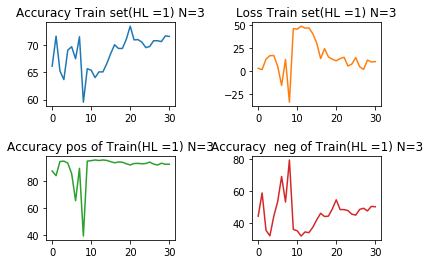

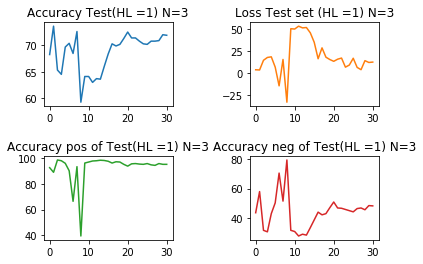

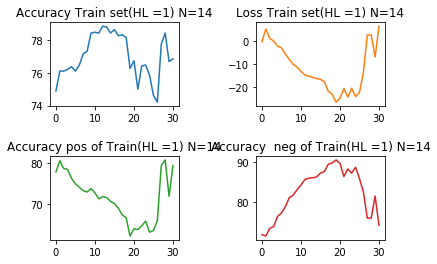

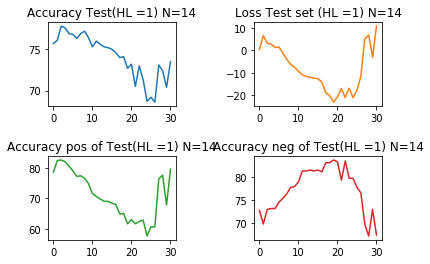

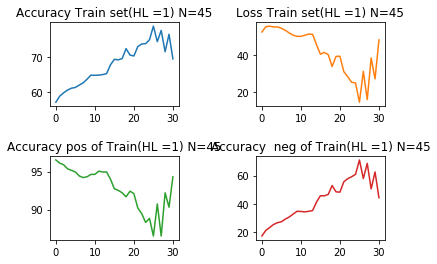

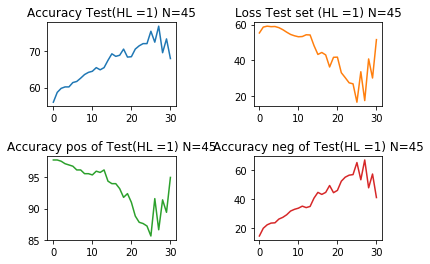

In [ ]:
no_of_units_in_hidden_list = [3,14,45]
batch_size_list = [2,4,6,8,10]
a = 0
for s in range (len(no_of_units_in_hidden_list)):
#for s in range (len(batch_size_list)):
  no_of_input_units = 1024
  no_of_units_in_hidden_layer1 = no_of_units_in_hidden_list[s]
  #no_of_units_in_hidden_layer1 = 35
  no_of_output_units = 1
  learning_rate = 0.01
  momentum = 0.5

  batch_size = 2
  print("Train for ",no_of_units_in_hidden_layer1,"hidden units"," batch size:",batch_size)
  weights_1,biases_1,weights_2,biases_2,loss_train,accuracy_train,accuracy_p_train,accuracy_n_train,loss_test,accuracy_test,accuracy_p_test,accuracy_n_test,epoch_no = train_two_layer_nn(no_of_input_units,no_of_units_in_hidden_layer1,no_of_output_units,learning_rate,momentum,train_set_x,batch_size,train_set_y)
  print("Max accuracy value for ",no_of_units_in_hidden_layer1,"hidden units",max(accuracy_train))

  plt.figure(s)
  fig, axs = plt.subplots(2, 2)
  fig.subplots_adjust(hspace=0.6)
  fig.subplots_adjust(wspace=0.6)
  axs[0, 0].plot(epoch_no,accuracy_train)
  axs[0, 0].set_title("Accuracy Train set(HL =1) N="+str(no_of_units_in_hidden_layer1))
  axs[0, 1].plot( epoch_no,loss_train, 'tab:orange')
  axs[0, 1].set_title("Loss Train set(HL =1) N="+str(no_of_units_in_hidden_layer1))
  axs[1, 0].plot( epoch_no,accuracy_p_train, 'tab:green')
  axs[1, 0].set_title("Accuracy pos of Train(HL =1) N="+str(no_of_units_in_hidden_layer1))
  axs[1, 1].plot(epoch_no,accuracy_n_train,'tab:red')
  axs[1, 1].set_title("Accuracy  neg of Train(HL =1) N="+str(no_of_units_in_hidden_layer1))

  plt.figure(s+1)
  fig, axs = plt.subplots(2, 2)
  fig.subplots_adjust(hspace=0.6)
  fig.subplots_adjust(wspace=0.6)
  axs[0, 0].plot(epoch_no,accuracy_test)
  axs[0, 0].set_title("Accuracy Test(HL =1) N="+str(no_of_units_in_hidden_layer1))
  axs[0, 1].plot( epoch_no,loss_test, 'tab:orange')
  axs[0, 1].set_title("Loss Test set (HL =1) N="+str(no_of_units_in_hidden_layer1))
  axs[1, 0].plot( epoch_no,accuracy_p_test, 'tab:green')
  axs[1, 0].set_title("Accuracy pos of Test(HL =1) N="+str(no_of_units_in_hidden_layer1))
  axs[1, 1].plot(epoch_no,accuracy_n_test,'tab:red')
  axs[1, 1].set_title("Accuracy neg of Test(HL =1) N="+str(no_of_units_in_hidden_layer1))

""" 
  plt.figure(a)

  plt.plot(epoch_no,accuracy_train)
  plt.title("Accuracy Train set(HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.figure(a+1)
  plt.plot( epoch_no,loss_train, 'tab:orange')
  plt.title("Loss Train set(HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.figure(a+2)
  plt.plot( epoch_no,accuracy_p_train, 'tab:green')
  plt.title("Accuracy pos of Train(HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Accuracy pos")
  plt.xlabel("Epoch")
  plt.figure(a+3)
  plt.plot(epoch_no,accuracy_n_train,'tab:red')
  plt.title("Accuracy  neg of Train(HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Accuracy neg")
  plt.xlabel("Epoch")

  plt.figure(a+4)
  plt.plot(epoch_no,accuracy_test)
  plt.title("Accuracy Test(HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.figure(a+5)
  plt.plot( epoch_no,loss_test, 'tab:orange')
  plt.title("Loss Test set (HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.figure(a+6)
  plt.plot( epoch_no,accuracy_p_test, 'tab:green')
  plt.title("Accuracy pos of Test(HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Accuracy of positive")
  plt.xlabel("Epoch")
  plt.figure(a+7)
  plt.plot(epoch_no,accuracy_n_test,'tab:red')
  plt.title("Accuracy neg of Test(HL =1) N_1="+str(no_of_units_in_hidden_layer1))
  plt.ylabel("Accuracy of negative")
  plt.xlabel("Epoch")
  a = a + 8
"""
plt.show()





In [ ]:

print("train_two_layer_nn")
def get_mini_batches(X, y, batch_size):
    random_idxs = random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs,:]
    y_shuffled = y[random_idxs]
    mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for
                    i in range(0, len(y), batch_size)]
    return mini_batches

mini_batches = get_mini_batches(np.asarray(train_set_x),np.asarray(train_set_y),4)  



def create_two_layers(no_of_input_units,no_of_units_in_hidden_layer1,no_of_output_units):
  def create_layer_neurons(no_of_input_features,units_in_layer):
    mu, sigma = 0, 0.1 # mean and standard deviation  
    biases = []
    weights = []  

    for i in range(units_in_layer):
      weight = np.random.normal(mu,no_of_input_features**(-1/2),no_of_input_features)
      bias= np.random.normal(mu,no_of_input_features**(-1/2),1)
      weights.append(weight)
      biases.append(bias) 
    return np.asarray(weights),np.asarray(biases)
  
  weights_1,biases_1= create_layer_neurons(no_of_input_units,no_of_units_in_hidden_layer1)  
  weights_2,biases_2 = create_layer_neurons(no_of_units_in_hidden_layer1,no_of_output_units) 
  return weights_1,biases_1,weights_2,biases_2

def find_nets1_nets2(weights_1,biases_1,weights_2,biases_2,input_features): 
  def find_outputs(nets):
    def activation_function(value):
      import math
      return math.tanh(value)      
    
    outputs =[]
    for i in range(len(nets)):
      
      outputs.append(activation_function(nets[i]))
    return np.asarray(outputs)     

  def find_nets(weights,biases,input_features):
    nets = []
    for i in range(len(weights)):
      net = sum(weights[i]*input_features) + biases[i]
      nets.append(net[0])
    return np.asarray(nets)
  
  nets_1 = find_nets(weights_1,biases_1,input_features)
  outputs_1 = find_outputs(nets_1)
  nets_2 = find_nets(weights_2,biases_2,outputs_1)
  
  return nets_1,nets_2 


def find_outputs_1_outputs_2(nets_1,nets_2):
  def find_outputs(nets):
    def activation_function(value):
      import math
      return math.tanh(value)      
    
    outputs =[]
    for i in range(len(nets)):
      
      outputs.append(activation_function(nets[i]))
    return np.asarray(outputs)     
  outputs_1 = find_outputs(nets_1)
  outputs_2 = find_outputs(nets_2)
  return outputs_1,outputs_2


def deriv_activation_function(value):
  import math
  return (1-math.tanh(value)**2)  

def find_delta_1_delta_2(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon):  
  def find_delta_2(outputs_1,outputs_2,epsilon):
    deriv_o = deriv_activation_function(nets_2[0])
    delta_2 = -epsilon*deriv_o*outputs_1 
    delta_b_2 =  -epsilon*deriv_o
    return np.asarray(delta_2),np.asarray(delta_b_2)
  def find_delta_1(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon):
    deriv_o = deriv_activation_function(nets_2[0])
    deriv_of_nets_1 = []
    #print("nets_2[0]",nets_2[0])

    #print("epsilon",epsilon)
    scalar = -epsilon*deriv_o 
    #print("deriv_o",deriv_o)
    delta_1 =[]
    delta_b_1 =[]
    for i in range(len(nets_1)):
      deriv_of_nets_1.append(weights_2[0][i]*deriv_activation_function(nets_1[i]))  
    deriv_of_nets_1 = np.asarray(deriv_of_nets_1)
    #print("deriv_of_nets_1",deriv_of_nets_1)
    for i in range(len(deriv_of_nets_1)):
      delta_1.append(scalar*deriv_of_nets_1[i]*input_features)
      delta_b_1.append(scalar*deriv_of_nets_1[i])
    return np.asarray(delta_1),np.asarray(delta_b_1)

  delta_1,delta_b_1 = find_delta_1(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon)
  delta_2,delta_b_2 = find_delta_2(outputs_1,outputs_2,epsilon)
  return delta_1,delta_b_1,delta_2,delta_b_2

no_of_units_in_hidden_list = [5,15,25,35,45,55]
#no_of_units_in_hidden_list = [92]
for s in range (len(no_of_units_in_hidden_list)):
  no_of_input_units = 1024
  no_of_units_in_hidden_layer1 = no_of_units_in_hidden_list[s]
  no_of_output_units = 1
  learning_rate = 0.01
  momentum = 0.9
  weights_1,biases_1,weights_2,biases_2=create_two_layers(no_of_input_units,no_of_units_in_hidden_layer1,no_of_output_units)
  loss_train =[]
  accuracy_train =[]
  accuracy_p_train =[]
  accuracy_n_train =[]
  loss_test =[]
  accuracy_test =[]
  accuracy_p_test =[]
  accuracy_n_test =[]
  epoch_no = []
  V_1 = 0
  V_b_1 = 0
  V_2 = 0
  V_b_2 = 0

  for i in range(10000):
    if i%2 == 0:
        index = random.randint(1,950)
    else :
        index = random.randint(950,1900-1)
    input_features = train_set_x[index]
    input_features =  np.asarray(np.asarray(input_features).flatten())/255
    nets_1,nets_2 = find_nets1_nets2(weights_1,biases_1,weights_2,biases_2,input_features)
    outputs_1,outputs_2= find_outputs_1_outputs_2(nets_1,nets_2)
    target = train_set_y[index]
    epsilon = target-outputs_2[0]
    
    delta_1,delta_b_1,delta_2,delta_b_2= find_delta_1_delta_2(outputs_1,outputs_2,nets_1,input_features,weights_2,epsilon)
    V_1 = momentum*V_1+(1-momentum)*delta_1
    V_b_1 = momentum*V_b_1+(1-momentum)*delta_b_1
    V_2 = momentum*V_2+(1-momentum)*delta_2
    V_b_2 = momentum*V_b_2+(1-momentum)*delta_b_2
    weights_1 = weights_1-learning_rate *V_1
    weights_2 = weights_2-learning_rate *V_2
    biases_1 = biases_1-learning_rate*V_b_1
    biases_2 = biases_2-learning_rate*V_b_2

  print("-----------------Performance metrics in train set at: ",no_of_units_in_hidden_layer1,". epoch ----------------------------")
  loss,accuracy,accuracy_p,accuracy_n =  test_two_layer_nn(weights_1,biases_1,weights_2,biases_2,train_set_x,train_set_y)
  loss_train.append(loss)
  accuracy_train.append(accuracy)
  accuracy_p_train.append(accuracy_p)
  accuracy_n_train.append(accuracy_n)

  print("-----------------Performance metrics in test set at: ",no_of_units_in_hidden_layer1,". epoch ----------------------------")
  loss,accuracy,accuracy_p,accuracy_n = test_two_layer_nn(weights_1,biases_1,weights_2,biases_2,test_set_x,test_set_y)
  loss_test.append(loss)
  accuracy_test.append(accuracy)
  accuracy_p_test.append(accuracy_p)
  accuracy_n_test.append(accuracy_n)


train_two_layer_nn
-----------------Performance metrics in train set at:  5 . epoch ----------------------------
Accuracy % 73.26315789473684
Accuracy_p % 60.0
Accuracy_n % 86.52631578947368
Loss % -17.976035761552776
-----------------Performance metrics in test set at:  5 . epoch ----------------------------
Accuracy % 73.5
Accuracy_p % 61.6
Accuracy_n % 85.39999999999999
Loss % -16.600002008780514
-----------------Performance metrics in train set at:  15 . epoch ----------------------------
Accuracy % 77.78947368421053
Accuracy_p % 68.10526315789474
Accuracy_n % 87.47368421052632
Loss % -20.095077691712266
-----------------Performance metrics in test set at:  15 . epoch ----------------------------
Accuracy % 77.4
Accuracy_p % 68.2
Accuracy_n % 86.6
Loss % -17.505786239154077
-----------------Performance metrics in train set at:  25 . epoch ----------------------------
Accuracy % 81.15789473684211
Accuracy_p % 76.21052631578948
Accuracy_n % 86.10526315789474
Loss % -8.775619661477203